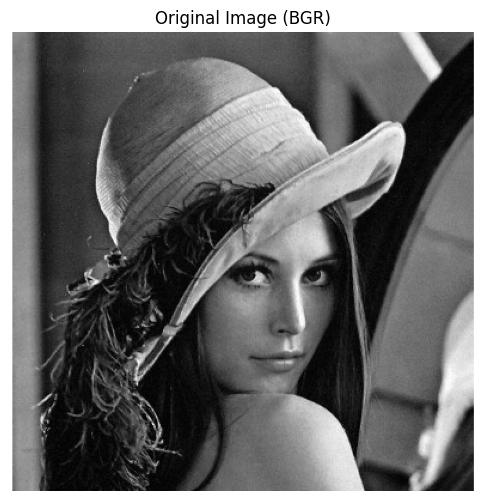

Image Size: Width=389, Height=384, Channels=3
Total Number of Pixels: 149376


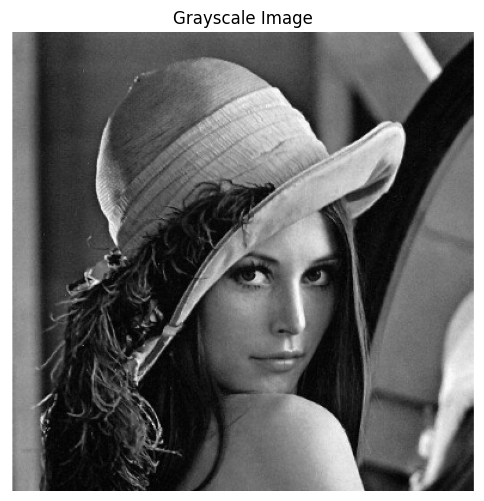

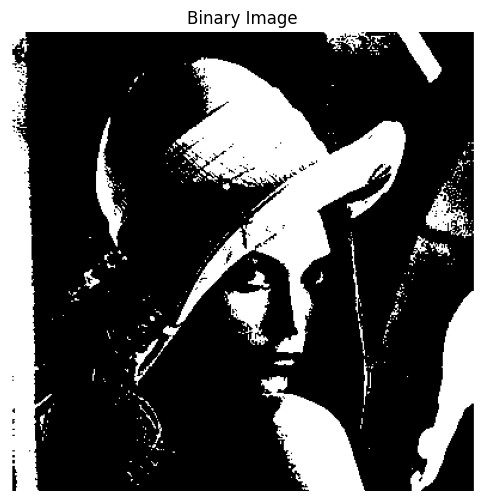

Total Black Pixels: 112694


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

image_path = "/content/image.png"
image = cv2.imread(image_path)

display_image("Original Image (BGR)", image)

height, width, channels = image.shape
print(f"Image Size: Width={width}, Height={height}, Channels={channels}")

total_pixels = height * width
print(f"Total Number of Pixels: {total_pixels}")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_image.jpg", gray_image)
display_image("Grayscale Image", gray_image)

_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite("binary_image.jpg", binary_image)
display_image("Binary Image", binary_image)

black_pixel_count = np.sum(binary_image == 0)
print(f"Total Black Pixels: {black_pixel_count}")


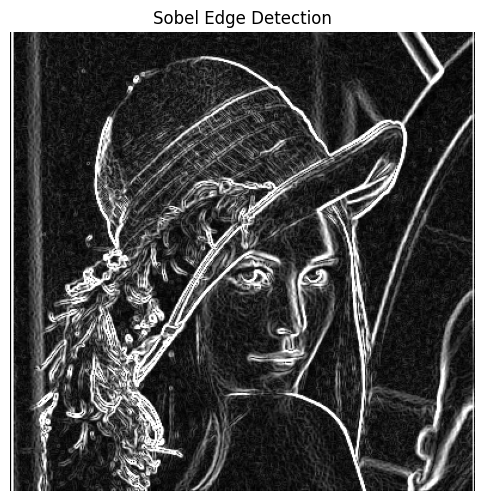

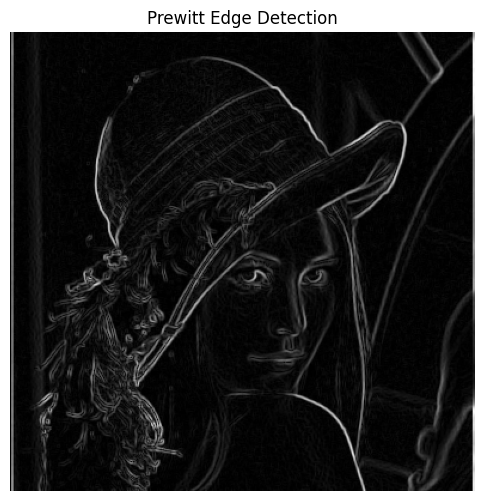

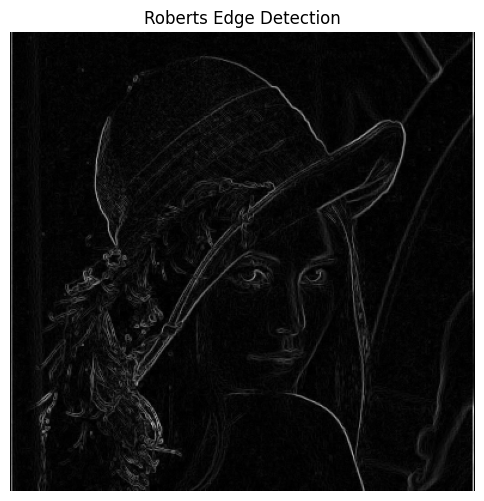

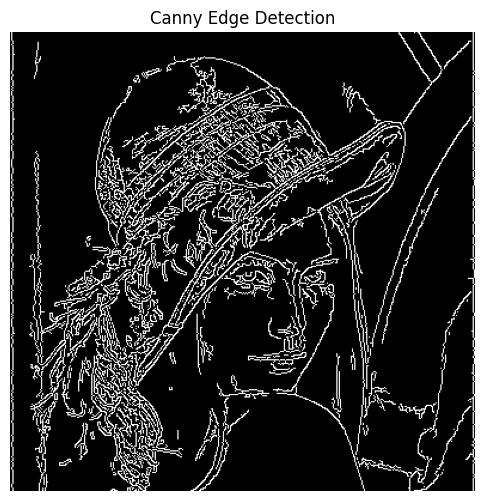

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, roberts

def display_image(title, image):
    plt.figure(figsize=(6, 6))
    if image.dtype == np.float64:
        image = (image / image.max() * 255).astype(np.uint8)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB) if len(image.shape) == 3 else image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

image = cv2.imread('/content/image.png')
if image is None:
    print("Error: Image not found. Please check the file path.")
else:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)

    sobel_combined = cv2.convertScaleAbs(sobel_combined)
    display_image("Sobel Edge Detection", sobel_combined)

    prewitt_edges = prewitt(gray_image)

    prewitt_edges = np.uint8(prewitt_edges * 255)
    display_image("Prewitt Edge Detection", prewitt_edges)

    roberts_edges = roberts(gray_image)
    roberts_edges = np.uint8(roberts_edges * 255)
    display_image("Roberts Edge Detection", roberts_edges)

    canny_edges = cv2.Canny(gray_image, 50, 150)
    display_image("Canny Edge Detection", canny_edges)
